In [ ]:
pip install wordcloud fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_qzjsf8d/fbprophet_e42dd76b4ee745f9ad7015c421cf9828/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_qzjsf8d/fbprophet_e42dd76b4ee745f9ad7015c421cf9828/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.c

In [ ]:
#Install the necessary packages

#pip install wordcloud fbprophet

import pandas as pd
from shapely.geometry import  Point
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import os
import re
import lightgbm as lgb
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#reading the data into a dataframe
crime_data1_df=pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2010_to_2019.csv') #data from 2010-2019
crime_data2_df=pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv') #data from 2020-Present

In [ ]:
#concat the two dataframes
crime_data=pd.concat([crime_data1_df,crime_data2_df])
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


**Data Cleaning**

In [ ]:
#Checking the number of rows and columns in the dataset
crime_data.shape

(2444416, 29)

In [ ]:
#Look at all he columns to get an idea of what data we have
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA'],
      dtype='object')

In [ ]:
#View the data types
crime_data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA              float64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
AREA              float64
dtype: object

In [ ]:
#Checking the ages to identify variations
crime_data['Vict Age'].value_counts()

 0      449277
 25      54639
 26      54257
 27      53871
 28      53612
         ...  
-10          2
-11          1
 114         1
 118         1
 120         1
Name: Vict Age, Length: 113, dtype: int64

In [ ]:
#Removing ages<0
crime_data=crime_data[crime_data['Vict Age']>0]

In [ ]:
#Checking the latitude and longitude of LA
crime_data['LAT'].value_counts()

34.1016    13581
34.2012    10690
34.1867     8121
34.1939     7512
34.0980     7345
           ...  
33.8671        1
33.8340        1
33.8593        1
33.7586        1
33.7390        1
Name: LAT, Length: 5559, dtype: int64

In [ ]:
crime_data['LON'].value_counts()

-118.2739    18441
-118.2827    13402
-118.2915    12499
-118.3089    11195
-118.2652     9740
             ...  
-117.8945        1
-118.1114        1
-118.1583        1
-118.1404        1
-118.6011        1
Name: LON, Length: 5124, dtype: int64

In [ ]:
#Checking how many latitudes and longitiudes are wrongly marked
crime_data[(crime_data['LAT']<33)|(crime_data['LAT']>35)|(crime_data['LON']<-119)|(crime_data['LON']>-117)]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
49703,100618355,07/14/2010 12:00:00 AM,07/12/2010 12:00:00 AM,1900,6.0,Hollywood,665,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,900 N CISTRUS AV,NaN,0.0,0.0,NaN
60870,100718479,11/29/2010 12:00:00 AM,11/29/2010 12:00:00 AM,1630,7.0,Wilshire,709,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,998.0,NaN,NaN,HARBOR,CLINTON,0.0,0.0,NaN
85026,101016365,09/09/2010 12:00:00 AM,08/23/2010 12:00:00 AM,1500,10.0,West Valley,1000,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,CITY OF WINNETKA,CITY OF WINNETKA,0.0,0.0,NaN
205973,120215454,07/31/2012 12:00:00 AM,01/01/2010 12:00:00 AM,1400,2.0,Rampart,289,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,Invest Cont,812.0,NaN,NaN,NaN,1100 S UNION AV,NaN,0.0,0.0,NaN
206921,122113857,07/30/2012 12:00:00 AM,03/18/2010 12:00:00 AM,1300,21.0,Topanga,2197,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,Invest Cont,341.0,NaN,NaN,NaN,4800 QUEEN VICTORIA RD,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325674,211011175,08/11/2021 12:00:00 AM,08/11/2021 12:00:00 AM,1330,NaN,West Valley,1023,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,19200 HAYNES ST,NaN,0.0,0.0,10.0
325865,210615187,08/30/2021 12:00:00 AM,08/30/2021 12:00:00 AM,1645,NaN,Hollywood,678,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,999.0,NaN,NaN,1000 N WESTERN AV,NaN,0.0,0.0,6.0
325880,211216522,07/26/2021 12:00:00 AM,07/26/2021 12:00:00 AM,1130,NaN,77th Street,1259,2,903,CONTEMPT OF COURT,...,Invest Cont,903.0,NaN,NaN,NaN,600 E 74TH ST,NaN,0.0,0.0,12.0
325899,211218708,08/30/2021 12:00:00 AM,08/30/2021 12:00:00 AM,130,NaN,77th Street,1265,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,1000 W 84TH PL,NaN,0.0,0.0,12.0


In [ ]:
#Dropping 2573 latitudes and longitudes values that were not mapped to LA
crime_data=crime_data[(crime_data['LAT']>33)|(crime_data['LAT']<35)|(crime_data['LON']>-119)|(crime_data['LON']<-117)]

In [ ]:
#The next step was to handle the NULL values.
crime_data.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA               246977
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes             28381
Vict Age                0
Vict Sex               77
Vict Descent          107
Premis Cd              24
Premis Desc           144
Weapon Used Cd    1207384
Weapon Desc       1207385
Status                  1
Status Desc             0
Crm Cd 1                9
Crm Cd 2          1858284
Crm Cd 3          1990391
Crm Cd 4          1994359
LOCATION                0
Cross Street      1659479
LAT                     0
LON                     0
AREA              1747511
dtype: int64

In [ ]:
crime_data['Weapon Desc'].unique()

array([nan, 'HAND GUN', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'SIMULATED GUN',
       'FOLDING KNIFE', 'OTHER KNIFE', 'MACE/PEPPER SPRAY', 'STICK',
       'UNKNOWN FIREARM', 'SWITCH BLADE',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'BOARD', 'BLUNT INSTRUMENT',
       'SEMI-AUTOMATIC PISTOL', 'VEHICLE', 'OTHER CUTTING INSTRUMENT',
       'SCISSORS', 'BOTTLE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'CLUB/BAT', 'BRASS KNUCKLES',
       'KITCHEN KNIFE', 'BELT FLAILING INSTRUMENT/CHAIN',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SCREWDRIVER', 'FIRE',
       'STUN GUN', 'RIFLE', 'RAZOR BLADE', 'DIRK/DAGGER',
       'CAUSTIC CHEMICAL/POISON', 'SHOTGUN', 'ICE PICK',
       'ROCK/THROWN OBJECT', 'REVOLVER', 'OTHER FIREARM', 'BOWIE KNIFE',
       'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'SCALDING LIQUID',
       'BOMB THREAT', 'MACHETE', 'TOY GUN',
       'UZI SEMIAUTOMAT

In [ ]:
#Next, we noticed two repetitive columns for "AREA". So we removed the extra one.
crime_data=crime_data.drop(columns=['AREA'])

In [ ]:
#Checking the victim sex column for wrong genders
crime_data['Vict Sex'].unique()

array(['M', 'F', nan, 'H', 'X', '-', 'N'], dtype=object)

In [ ]:
crime_data["Vict Sex"].fillna("X",inplace=True)

In [ ]:
#We replaced sexes otheer than "M' and 'F" with 'O'
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['X','H','-','N'],'O')

In [ ]:
crime_data['Vict Descent'].unique()

array(['H', 'W', 'B', 'A', 'O', 'K', 'I', 'X', 'J', 'F', 'C', 'P', 'V',
       nan, 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [ ]:
#Replcing NULL values in the other columns
crime_data["Vict Descent"].fillna("-",inplace=True)
crime_data["Mocodes"].fillna("0",inplace=True)
crime_data["Crm Cd 1"].fillna(0,inplace=True)
crime_data["Crm Cd 2"].fillna(0,inplace=True)
crime_data["Crm Cd 3"].fillna(0,inplace=True)
crime_data["Crm Cd 4"].fillna(0,inplace=True)
crime_data["AREA "].fillna(0,inplace=True)
crime_data["Cross Street"].fillna("N/A",inplace=True)
crime_data["Premis Cd"].fillna(0,inplace=True)
crime_data["Premis Desc"].fillna("Unknown",inplace=True)
crime_data["Weapon Used Cd"].fillna(0,inplace=True)
crime_data["Weapon Desc"].fillna("NO WEAPON",inplace=True)
crime_data["Status"].fillna(0,inplace=True)

In [ ]:
#Checking the number of NULL values now.
crime_data.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [ ]:
#Dropping duplicates
crime_data.drop_duplicates(inplace=True)

In [ ]:
#Final shape after cleaning
crime_data.shape

(1994488, 28)

### **Exploratory Data Analysis(EDA)**

In [ ]:
#Vizualizing the number of crimes for different ages
crime_age_num=crime_data.groupby(['Vict Age'])['Vict Age'].count()
crime_age_num.sort_values(ascending=False,inplace=True)

In [ ]:
print("The top 10 victim ages to whom crimes most occur on are the following\n",crime_age_num.head(10))

The top 10 victim ages to whom crimes most occur on are the following
 Vict Age
25    54639
26    54257
27    53871
28    53612
29    53146
24    52715
30    52703
23    50776
31    50152
32    48635
Name: Vict Age, dtype: int64


In [ ]:
print("The top 10 victim ages to whom crimes least occur on are the following\n",crime_age_num.tail(10))

The top 10 victim ages to whom crimes least occur on are the following
 Vict Age
92     554
93     492
94     367
95     283
96     219
97     193
98     144
114      1
118      1
120      1
Name: Vict Age, dtype: int64


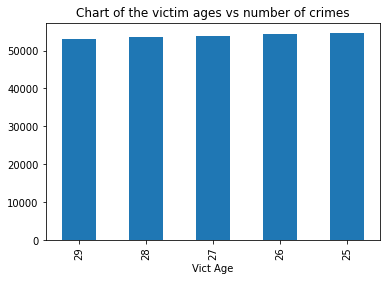

In [ ]:
crime_age_num.sort_values().tail().plot(kind='bar',title="Chart of the victim ages vs number of crimes")

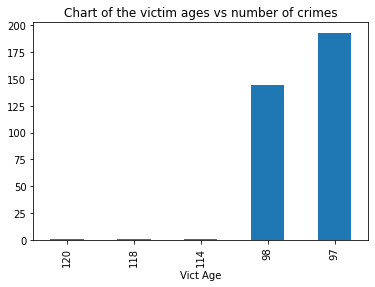

In [ ]:
crime_age_num.sort_values().head().plot(kind='bar',title="Chart of the victim ages vs number of crimes")

In [ ]:
#Vizualizing the number of crimes for different victim sexes
crime_sex_num=crime_data.groupby(['Vict Sex'])['Vict Sex'].count()
crime_sex_num.sort_values(ascending=False,inplace=True)

In [ ]:
print("The top victim sexes to whom crimes least occur on are the following\n",crime_sex_num)

The top victim sexes to whom crimes least occur on are the following
 Vict Sex
F    994309
M    991487
O      8692
Name: Vict Sex, dtype: int64


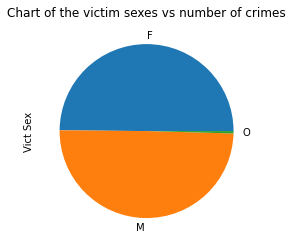

In [ ]:
crime_sex_num.plot(kind='pie',title="Chart of the victim sexes vs number of crimes")

In [ ]:
#Vizualizing the number of crimes for different victim descents
crime_descent_num=crime_data.groupby(['Vict Descent'])['Vict Descent'].count()
crime_descent_num.sort_values(ascending=False,inplace=True)

In [ ]:
print("The top victim descents to whom crimes least occur on are the following\n",crime_descent_num)

The top victim descents to whom crimes least occur on are the following
 Vict Descent
H    804012
W    532103
B    376277
O    186893
A     57002
X     19233
K     10152
F      3535
C      1854
I      1115
J       740
V       444
P       401
Z       219
U       186
-       109
G       107
S        41
D        37
L        28
Name: Vict Descent, dtype: int64


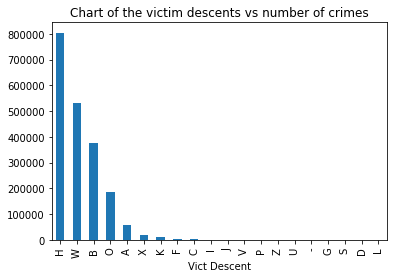

In [ ]:
crime_descent_num.plot(kind='bar',title="Chart of the victim descents vs number of crimes")

In [ ]:
#Vizualizing the number of crimes in different areas
crime_area_num=crime_data.groupby(['AREA NAME'])['AREA NAME'].count().head(10)
crime_area_num.sort_values(ascending=False,inplace=True)
print("The top 10 areas with the most occuring crimes are\n",crime_area_num)

The top 10 areas with the most occuring crimes are
 AREA NAME
77th Street    140251
N Hollywood    104790
Central        101809
Mission         94032
Hollywood       93570
Devonshire      87628
Newton          87326
Harbor          80885
Foothill        73589
Hollenbeck      66138
Name: AREA NAME, dtype: int64


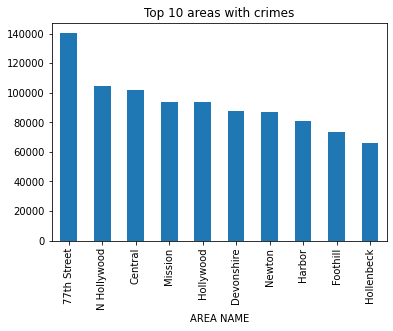

In [ ]:
crime_area_num.plot(kind='bar',title="Top 10 areas with crimes")

In [ ]:
#Splitting the date column to get the year
crime_data['DATE OCC']=pd.to_datetime(crime_data['DATE OCC'],format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
#Saving the year of the crime occurence in a column "Year"
crime_data['Year']=pd.DatetimeIndex(crime_data['DATE OCC']).year

In [ ]:
#Vizualizing the number of crimes in different years
crime_year_num=crime_data.groupby(['Year'])['Year'].count()
crime_year_num.sort_values(ascending=False,inplace=True)
print("The frequency of crimes based on the year of occurence are\n",crime_year_num)

The frequency of crimes based on the year of occurence are
 Year
2017    186608
2018    186262
2016    183481
2015    179059
2019    175951
2010    173626
2012    168846
2011    168230
2014    163864
2013    161584
2020    149174
2021     97803
Name: Year, dtype: int64


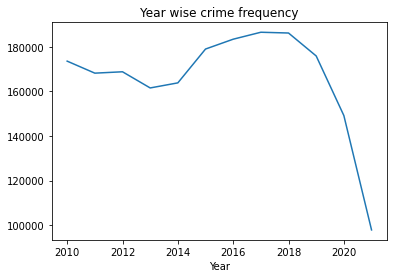

In [ ]:
crime_data.groupby([crime_data.Year]).size().plot(kind='line',stacked=False,title="Year wise crime frequency")

In [ ]:
#Saving the month of the crime occurence in a column "Month"
crime_data['Month']=pd.DatetimeIndex(crime_data['DATE OCC']).month

In [ ]:
#Vizualizing the number of crimes in different months
crime_month_num=crime_data.groupby(['Month'])['Month'].count()
crime_month_num.sort_values(ascending=False,inplace=True)
print("The frequency of crimes based on the month of occurence are\n",crime_month_num)

The frequency of crimes based on the month of occurence are
 Month
7     178713
1     176905
8     175812
5     174733
6     172119
3     170433
4     166802
10    162376
9     157187
12    154802
2     154395
11    150211
Name: Month, dtype: int64


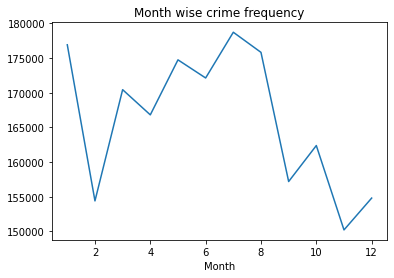

In [ ]:
crime_data.groupby([crime_data.Month]).size().plot(kind='line',stacked=False,title="Month wise crime frequency")

We could infer that the number of crimes have come down drastically in 2021. The years between 2016-2019 saw some of the highest number of crimes committed in LA. The rest of the years were however very similar range and there is no specific trend since we do not see a plateau,incline or decline.

Similarly there was no standard trend for crimes occuring per month either. There we decided to dig deeper and try to see the days in which crimes occur.

In [ ]:
#Saving the day of the crime occurence in a column "Day"
crime_data['Day']=pd.DatetimeIndex(crime_data['DATE OCC']).day

In [ ]:
#Vizualizing the number of crimes in different months
crime_day_num=crime_data.groupby(['Day'])['Day'].count()
crime_day_num.sort_values(ascending=False,inplace=True)
print("The frequency of crimes based on the days of occurence are\n",crime_day_num)

The frequency of crimes based on the days of occurence are
 Day
1     104173
15     69814
20     66840
10     65570
18     64910
16     64791
21     64547
14     64524
23     64444
13     64338
5      64323
24     64303
17     64249
28     64120
3      64097
22     63989
25     63888
12     63735
19     63719
2      63617
26     63591
27     63399
4      63312
6      62893
8      62845
7      62774
11     62767
9      62359
29     59422
30     58844
31     38291
Name: Day, dtype: int64


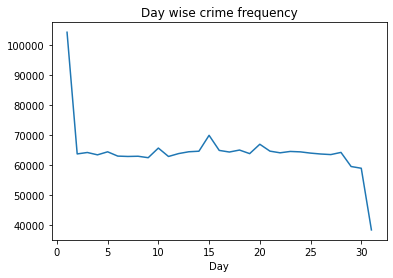

In [ ]:
crime_data.groupby([crime_data.Day]).size().plot(kind='line',stacked=False,title="Day wise crime frequency")

Here it is now evident that the 1st of every month have almost 1.5 times the number of crimes  that are commited on other days. Secondsly, the last few days of the monhts usually see some of the lowest crimes in the month. This could be explained by the tighter law enforcement during the last few days of the month.

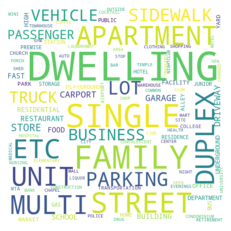

In [ ]:
#Word cloud for premis desc
crime_data['Premis Desc']=crime_data['Premis Desc'].fillna('')
text=" ".join(review for review in crime_data['Premis Desc'])
wordcloud=WordCloud(max_words=100,background_color="white",collocations=False,width=500,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

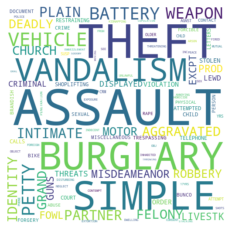

In [ ]:
#Word cloud for crime desc
crime_data['Crm Cd Desc']=crime_data['Crm Cd Desc'].fillna('')
text=" ".join(review for review in crime_data['Crm Cd Desc'])
wordcloud=WordCloud(max_words=100,background_color="white",collocations=False,width=500,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Vizualizing the number of crimes in different types
crime_type_num=crime_data.groupby(['Crm Cd Desc'])['Crm Cd Desc'].count().head(10)
crime_type_num.sort_values(ascending=False,inplace=True)
print("The top 10 most occuring crimes are\n",crime_type_num)

The top 10 most occuring crimes are
 Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                    215094
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              109377
BATTERY WITH SEXUAL CONTACT                                  12673
ATTEMPTED ROBBERY                                            12650
ARSON                                                         2979
BATTERY POLICE (SIMPLE)                                       2066
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                   577
BATTERY ON A FIREFIGHTER                                       307
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        12
ABORTION/ILLEGAL                                                 7
Name: Crm Cd Desc, dtype: int64


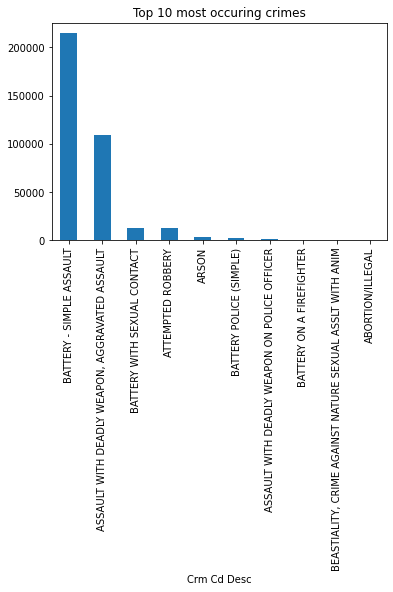

In [ ]:
crime_type_num.plot(kind='bar',title="Top 10 most occuring crimes")

In [ ]:
#Mapping Sex to numerical values i.e. M->1,F->2 and 0->3.
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['M'],1)
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['F'],2)
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['O'],3)
crime_data['Vict Sex'].unique()

array([1, 2, 3])

In [ ]:
#Mapping victim descent to numbers
crime_data['Vict Descent']=crime_data['Vict Descent'].replace(['H', 'W', 'B', 'A', 'O', 'K', 'I', 'X', 'J', 'F', 'C', 'P', 'V', 'U', 'G', 'D', 'S', 'Z', 'L','-'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
crime_data['Vict Descent'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 20, 14, 15, 16,
       17, 18, 19])

### **Data Modelling and Time series forecasting**

**FB Prophet**

In [ ]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,0.0,0.0,0.0,300 E GAGE AV,N/A,33.9825,-118.2695,2010,2,20
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,998.0,0.0,0.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010,1,5
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,0.0,0.0,0.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010,1,2
5,100100506,01/05/2010 12:00:00 AM,2010-01-04,1650,1.0,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,0.0,0.0,0.0,700 W 7TH ST,N/A,34.0480,-118.2577,2010,1,4
6,100100508,01/08/2010 12:00:00 AM,2010-01-07,2005,1.0,Central,182,1,330,BURGLARY FROM VEHICLE,...,0.0,0.0,0.0,PICO BL,GRAND AV,34.0389,-118.2643,2010,1,7


In [ ]:
#Creating the time dataframe that holds the date field and the frequency of crimes on that day.
#FB Prophet rquires the columns to be labelled as "ds" and "y".
time_df=pd.DataFrame(columns=['ds','y'])
time_df['ds']=crime_data['DATE OCC'].unique()
time_df['y']=crime_data['DATE OCC'].value_counts().values

In [ ]:
time_df.head()

,ds,y
0,2010-02-20,2154
1,2010-01-05,2090
2,2010-01-02,1721
3,2010-01-04,1528
4,2010-01-07,1446


In [ ]:
#Creating the FB Prophet model based on the time dataframe
fbp=Prophet()
fbp.fit(time_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#predicting crimes 3 years ahead of the current date
future_crimes=fbp.make_future_dataframe(periods=365*3)
crime_pred=fbp.predict(future_crimes)
crime_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,809.862096,772.028914,884.011803,809.862096,809.862096,18.214134,18.214134,18.214134,-0.250834,-0.250834,-0.250834,18.464967,18.464967,18.464967,0.0,0.0,0.0,828.076230
1,2010-01-02,808.682597,775.855595,894.204552,808.682597,808.682597,23.718654,23.718654,23.718654,5.475876,5.475876,5.475876,18.242778,18.242778,18.242778,0.0,0.0,0.0,832.401251
2,2010-01-03,807.503098,766.516744,880.175835,807.503098,807.503098,16.268256,16.268256,16.268256,-1.501778,-1.501778,-1.501778,17.770033,17.770033,17.770033,0.0,0.0,0.0,823.771354
3,2010-01-04,806.323598,766.456375,877.370876,806.323598,806.323598,16.455137,16.455137,16.455137,-0.587822,-0.587822,-0.587822,17.042959,17.042959,17.042959,0.0,0.0,0.0,822.778736
4,2010-01-05,805.144099,761.669564,878.962363,805.144099,805.144099,14.753823,14.753823,14.753823,-1.309259,-1.309259,-1.309259,16.063083,16.063083,16.063083,0.0,0.0,0.0,819.897922


Text(53.625, 0.5, 'Number of crimes')

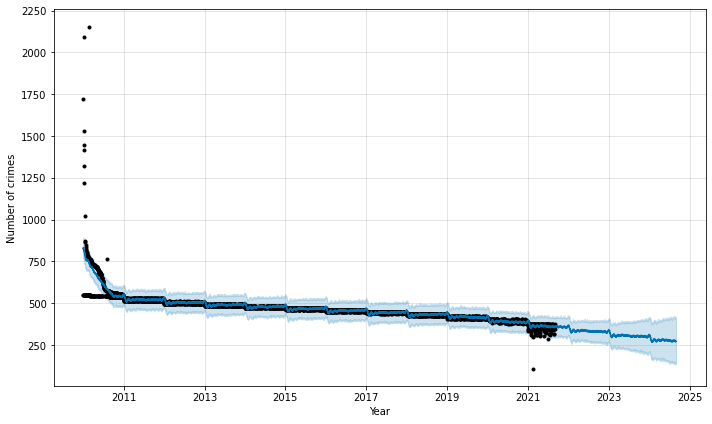

In [ ]:
fbp.plot(crime_pred)
plt.xlabel("Year")
plt.ylabel("Number of crimes")

### **Machine learning algorithms for classification**

### **Classification**

My goal in this project is to classify and predict the type of crimes that could occur based on certain other features. In order to classify, there are two general methods, binary class classification and multi-class classification.

I will perform both of them by mapping the crime type into a range using information from the county police department.

**Binary-class classification**

Here, I categorized the crimes based on the whether they were violent or not. If the criminal used his/her hands,body parts or any other instrument, it is classified as a violent crime. Basically, anything that is used to exhibit force is considered a violent crime.

In [ ]:
crime_data.loc[crime_data['Weapon Desc']=='NO WEAPON','Violent']=0

In [ ]:
crime_data["Violent"].fillna(1,inplace=True)

In [ ]:
crime_data['Violent'].value_counts()

0.0    1207385
1.0     787103
Name: Violent, dtype: int64

In [ ]:
#Feature selection
crime_data_binary=crime_data[['Rpt Dist No','Crm Cd','Vict Age','Vict Sex','Vict Descent','Premis Cd','LAT','LON','Violent']]

In [ ]:
crime_data_binary.head()

,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,LAT,LON,Violent
0,1385,900,48,1,1,501.0,33.9825,-118.2695,0.0
3,646,900,47,2,2,101.0,34.1016,-118.3295,1.0
4,176,122,47,2,1,103.0,34.0387,-118.2488,1.0
5,162,442,23,1,3,404.0,34.0480,-118.2577,0.0
6,182,330,46,1,1,101.0,34.0389,-118.2643,0.0


Now, what we can see is that there are different categories of crime types. Since the goal of this project is to predict what crime could possibly happen, we can map categories of crimes to one type and use it to build our prediction model.

In [ ]:
X=crime_data_binary.drop(columns=['Violent'])
y=crime_data_binary['Violent']

In [ ]:
X.head()

,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,LAT,LON
0,1385,900,48,1,1,501.0,33.9825,-118.2695
3,646,900,47,2,2,101.0,34.1016,-118.3295
4,176,122,47,2,1,103.0,34.0387,-118.2488
5,162,442,23,1,3,404.0,34.0480,-118.2577
6,182,330,46,1,1,101.0,34.0389,-118.2643


In [ ]:
y.head()

0    0.0
3    1.0
4    1.0
5    0.0
6    0.0
Name: Violent, dtype: float64

Test Train Split

In [ ]:
#Splitting the dataset to 80% training and 20% testing.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

Scaling the data (Data transformation)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### **Machine Learning models**

Logistic Regression

In [ ]:
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred_lr)
print("Logistic Regression accuracy:",accuracy_score(y_test,y_pred_lr))

Logistic Regression accuracy: 0.6279650436953808


Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print("GNB accuracy:",accuracy_score(y_test,y_pred_gnb))
#gnb.score(y_test,y_pred_gnb)

GNB accuracy: 0.6234776810111858


Bernoulli Naive Bayes Classifer

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB(binarize=0.0)
BNB.fit(X_train,y_train)
y_pred_bnb=BNB.predict(X_test)
print("BNB accuracy:",accuracy_score(y_test,y_pred_bnb))
#BNB.score(y_test,y_pred_bnb)

BNB accuracy: 0.6711941398553014


Random Forest Classifier

In [ ]:
#n_estimators is the number of trees you want to build before taking the maximum voting or averages of predictions.

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))

NameError: ignored

K Nearest neighbours

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print("KNN accuracy:",accuracy_score(y_test,y_pred_knn))

KNN accuracy: 0.923519295659542


Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1,max_iter=5000)
NN.fit(X_train,y_train)
y_pred_nn=NN.predict(X_test)
print("Neural networks accuracy:",accuracy_score(y_test,y_pred_nn))

Neural networks accuracy: 0.848179233789089


In [ ]:
#model.save('drive/MyDrive/model.h5') #If using Google Colab

### **Mapping crime types for multi-class classification**

In [ ]:
#grouping the values of the crime type bbased on the LA county' s police department to aid in the prediction of data
def crime_mapping(i):
  if i in range(207,211):
    return 0 #kidnap
  if i in range(220,222):
    return 1 #intent to murder or commit felony
  elif i in range(230,231):
    return 2 #crime against employers
  elif i in range(236,238):
    return 3 #Human trafficking
  elif i in range(302,311):
    return 4 #crime against religion and offence against good morals
  elif i in range(346,368):
    return 5 #injuries
  elif i in range(403,423):
    return 6 #crimes against public peace
  else:
    return 7 #others

In [ ]:
crime_data.dtypes

DR_NO                      int64
Date Rptd                 object
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                     float64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                   int64
Vict Descent               int64
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
Year                       int64
Month                      int64
Day       

In [ ]:
crime_data_multi=crime_data[['Rpt Dist No','Crm Cd','Vict Age','Vict Sex','Vict Descent','Premis Cd','LAT','LON']]

In [ ]:
#Assignning the mapped values
crime_data_multi['Crime Type']=crime_data_multi['Crm Cd'].apply(crime_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Drop crime code
crime_data_multi.drop(columns=['Crm Cd'])

,Rpt Dist No,Vict Age,Vict Sex,Vict Descent,Premis Cd,LAT,LON,Crime Type
0,1385,48,1,1,501.0,33.9825,-118.2695,7
3,646,47,2,2,101.0,34.1016,-118.3295,7
4,176,47,2,1,103.0,34.0387,-118.2488,7
5,162,23,1,3,404.0,34.0480,-118.2577,7
6,182,46,1,1,101.0,34.0389,-118.2643,7
...,...,...,...,...,...,...,...,...
326206,2143,44,1,2,101.0,34.1855,-118.6296,7
326207,1524,38,2,1,108.0,34.1867,-118.3965,7
326209,564,41,2,3,502.0,33.7424,-118.2814,7
326210,1798,40,1,1,501.0,34.2302,-118.4775,7


In [ ]:
#Setting the feautes X and y
X=crime_data_multi.drop(columns=['Crime Type'])
y=crime_data_multi['Crime Type']

In [ ]:
#Test and train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Multi class Random Forest classifier**

In [ ]:
rf=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print("Multi class classification Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))

Multi class classification Random Forest Accuracy: 0.9746576819136722


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print("Multi class GNB accuracy:",accuracy_score(y_test,y_pred_gnb))

Multi class GNB accuracy: 0.9884556954409398


**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB(binarize=0.0)
BNB.fit(X_train,y_train)
y_pred_bnb=BNB.predict(X_test)
print("Multi class BNB accuracy:",accuracy_score(y_test,y_pred_bnb))

Multi class BNB accuracy: 0.6998255193056871
